Задача 1 

Загрузка данных 

Данные для задачи загрузить из дополнительных материалов или по ссылке: https://www.kaggle.com/datasets/atanaskanev/sqlite-sakila-sample-database?select=SQLite3+Sakila+Sample+Database+ERD.png Выбрать СУБД PostgreSQL илиMySQL. Загрузить файлы базы данных как таблицы в выбранную СУБД. При загрузке таблиц обратить внимание на отношения между таблицами: первичные ключи (PrimaryKey) и внешние ключи (ForeignKey). После загрузки данных в таблицу проверить корректность типов данных и значений. Выгрузить dump базы данных.

In [51]:
#импорт необходимых для работы библиотек
import psycopg2
import os
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#функция исполнения sql скрипта из файла

#исходные sql файлы скачанные с kaggle были мной отредактированны, двоичный тим даннх sqllite 
# одного из полей был заменен на двоичный тип postgresql bytea, также из файлов были удалены 
# лишние sql которые не нужны для выполнения задания (создание представлений запросов и 
# заполнение значений по умолчанию с помощью триггеров), также пришлось поменять последовательность 
# выполнения оставшихся скриптов

def run_sql_sqripts (file_name, dec=";"):
    with open(file_name, 'r') as file:
        query = file.read()
    query = query.split(dec)
    conn = psycopg2.connect(dbname="firstdb", user="denischeban", password="dengineering")
    cur = conn.cursor()
    for q in query:  
        try:
            cur.execute(q)
            conn.commit()
        except: 
            conn.rollback()
            continue
    cur.close()
    conn.close()
    file.close()


In [63]:
#создание базы
run_sql_sqripts (file_name="sqlite-sakila-schema.sql")

In [7]:
#заполнение базы данными
run_sql_sqripts (file_name="sqlite-sakila-insert-data.sql")

In [3]:
#создание резервной копии базы
damp_comand = "pg_dump -U denischeban firstdb > /Users/denischeban/python/innopolys_projects/project_1/firstdb.dump"
os.system(damp_comand)

0

In [6]:
#удаление данных из базы (запускать при необходимости)
run_sql_sqripts (file_name="sqlite-sakila-delete-data.sql")

In [62]:
#удаление базы (запускать при необходимости)
run_sql_sqripts (file_name="sqlite-sakila-drop-objects.sql")

Задача 2 

Подключение к БД и выполнение запросов

Внимательно изучить схему данных и загруженную базу из Задания1. Сформировать 1 или несколько классов по таблицам в базе данных.Подключиться к базе данных, загруженной в задаче 1 из python. При подключении рекомендуется использовать менеджер контекста. Выполнить запросы к данным для ответа на следующие вопросы и выгрузить в промежуточные таблицы: 

1. Какова доля фильмов в каждой рейтинговой категории (G,PG,PG-13,Rит.д.) в нашем ассортименте ?

2. Какие категории фильмов чаще всего арендуются клиентами?

3. Какова средняя продолжительность проката (rentalduration) для каждой категории фильмов? 

4. Каковы тенденции в ежемесячном доходе от проката (monthlyrentalrevenue) и продажах (sales) за прошедший год?

5. Как соотносятся показатели продаж в разных магазинах? 

6. Каковы средние затраты на замену (replacement_cost) фильмов в разных жанрах?

7. Какие актеры снимаются в самых разных жанрах фильмов? 

Результат выполненияз апросов сохранить в файлах.csv. Построить визуализации результатов запросов спомощью библиотек matplotlib,seaborn или plotl

In [19]:
#функция преобразующая результат sql запроса в датафрейм pandas
def sql_to_dataframe(query):
    conn = psycopg2.connect(dbname="firstdb", user="denischeban", password="dengineering")
    try:
        with conn.cursor() as cursor:
            df = pd.read_sql(query, conn, ) 
    finally:
        conn.close()
    return df

1. Какова доля фильмов в каждой рейтинговой категории (G,PG,PG-13,Rит.д.) в нашем ассортименте ?

In [ ]:
df = sql_to_dataframe('SELECT rating FROM film') #сформируем датафрейм по результатам sql запроса
df = df.groupby('rating')['rating'].count() #сгруппируем данные по рейтингу фильма
print(df) # выведем на экран количество фильмов по каждой рейтинговой категории
df.to_csv('rating_count.csv', sep=',', encoding='utf-8') #сохраним данные в файл

rating
G        178
NC-17    210
PG       194
PG-13    223
R        195
Name: rating, dtype: int64


/var/folders/2x/1_8vzn5j1d5261pbvlmhrkdm0000gn/T/ipykernel_54003/1777515844.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, )


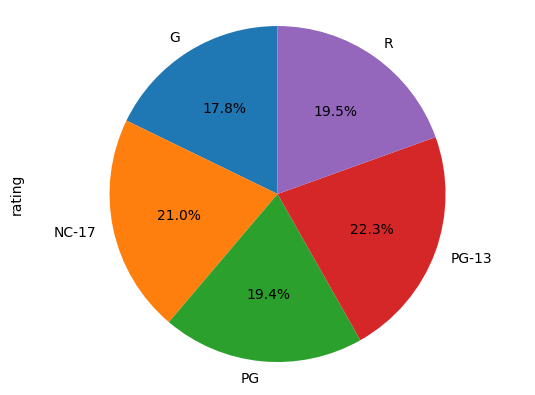

In [57]:
#выведем на экран круговую диаграмму с процентными долями фильмов в каждой рейтинговой категории в нашем ассортименте
df.plot.pie(y='rating', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


2.